# **Logistic Regression**

### **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [3]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### **About Dataset**

In [4]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### **Data Visulization**

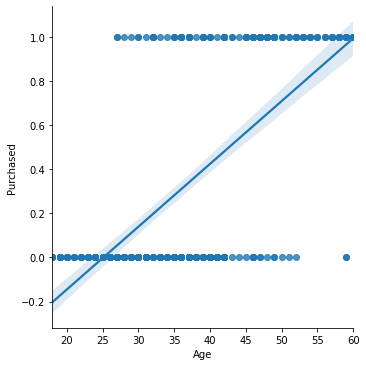

In [8]:
sns.lmplot(x='Age',y ='Purchased', data=df)

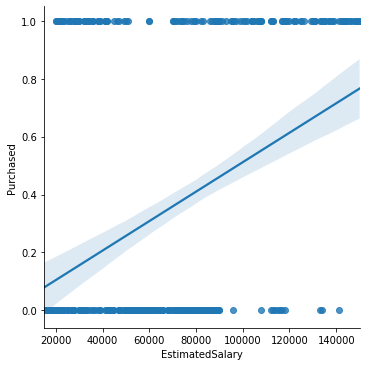

In [9]:
sns.lmplot(x='EstimatedSalary',y ='Purchased', data=df)

Text(0.5, 0, 'Purchased')

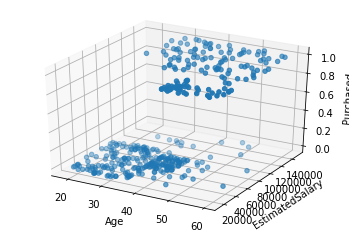

In [10]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
z = np.linspace(0, 15, 400)
zdata = 1 * np.random.random(400)
ax.scatter3D(df['Age'], df['EstimatedSalary'], df['Purchased'],cmap = 'Blues')
ax.set_xlabel('Age', fontsize= 10)
ax.set_ylabel("EstimatedSalary", fontsize=10)
ax.set_zlabel("Purchased", fontsize=10)

### **Spliting Data Into Train and Test Sets**

In [11]:
df.columns = [num for num in range(len(df.columns))]
df.head()

,0,1,2,3,4
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [12]:
X_df = df.drop([0, 1, 4], axis = 1)
Y_df = df[4]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.33, random_state=42)

### **Feature Scaling**

In [14]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### **Training Linear Model**

##### **Model Instance**

In [15]:
model = LogisticRegression()

##### **Fitting Data in Model**

In [16]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### **Print Coefficients of Model**

In [17]:
print("Coefficients: ", model.coef_)

Coefficients:  [[1.83257149 1.0898586 ]]


### **Model Prediction**

In [18]:
pred = model.predict(X_test)

### **Model Evaluation**

#### **Confusion Matrix**

In [19]:
cm = confusion_matrix(Y_test, pred)
print(cm)

[[79  1]
 [20 32]]


#### **Accuracy**

In [20]:
accuracy = (cm[0][0] + cm[1][1])/(np.sum(cm))
print("Accuracy:", accuracy)

Accuracy: 0.8409090909090909


#### **Calculating Error**

In [21]:
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test, pred))
print("Mean Squared Error:", metrics.mean_squared_error(Y_test, pred))
print("Root Mean Square Error:", np.sqrt(metrics.mean_squared_error(Y_test, pred)))

Mean Absolute Error: 0.1590909090909091
Mean Squared Error: 0.1590909090909091
Root Mean Square Error: 0.3988620176087328


#### **Precision, Recall, F1 Score**

In [22]:
precision = cm[0][0]/(cm[0][0] + cm[0][1])
recall = cm[0][0]/(cm[0][0] + cm[1][0])
f_score = 2/(1/recall + 1/precision)
print("Precision:", precision)
print("Recall:", recall)
print("F-Score:", f_score)

Precision: 0.9875
Recall: 0.797979797979798
F-Score: 0.8826815642458102


#### **Ploting Graph**

Text(0, 0.5, 'Predicted Y')

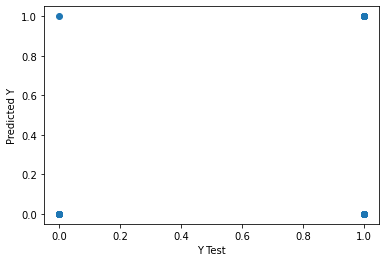

In [23]:
plt.scatter(Y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

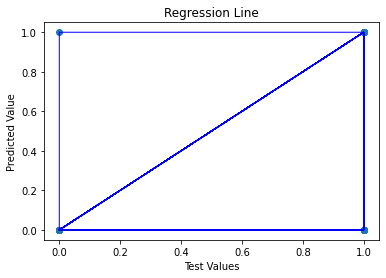

In [24]:
plt.title("Regression Line")
plt.xlabel("Test Values")
plt.ylabel("Predicted Value")
plt.plot(Y_test, pred, color='blue', linewidth=1)
plt.scatter(Y_test,pred)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


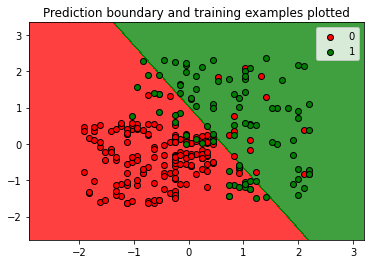

In [25]:
plt.figure(1)

X_set, Y_set = X_train, Y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j , 1], c = ListedColormap(('red', 'green'))(i), label = j, linewidths = 1, edgecolor = 'black')

plt.title('Prediction boundary and training examples plotted')
plt.legend()
plt.show()